# Pokemon Stats Data Analysis

In main series pokemon games, kids and adults alike catch pokemon and battle gym leaders to become pokemon master! With over 800 pokemon in some games, the team combinations and strategies are limitless. You must understand a pokemon stats to predict how they will perform in battle and to create a powerful team. I have obatined data on all pokemons stats from Genration 1 to Genration 6 or the `Pokemon X` and `Pokemon Y` games that came out in October 12, 2013 on the Nintendo 3ds. The goal of my project is to analyze the data within the Pokemon Stats csv, and determine what top 10 pokemon have the best total stats in each generation. This analysis will help even the most novice of players make the best team no matter what generation they are playing.


![](images/pokemon_johto.gif)

## Fields in My Dataset

Kaggle publishes downloadable files of Pokemon stats data. This data includes:

* Name
* Type 1 (All Pokemon will have a type in this field)
* Type 2 (Some Pokemon may have two types and the second one will populate here)
* Total (Total Base Stats of the Pokemon)
* HP 
* Attack (Stat for physical attacks)  
* Defense (Stat for defending against physical attacks)
* Sp. Atk (Stat for non-physical attacks ex:shooting a blast at a pokemon)
* Sp. Def (Stat for defending against special attacks)
* Speed 
* Generation
* Legendary

## Downloading My Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (9, 8)
plt.rcParams['font.size'] = 12
pkmn = pd.read_csv('data/Pokemon.csv')
pkmn.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


I then wanted to see how many rows and columns were in my data. Below are the results.

In [3]:
pkmn.shape

(800, 13)

Before diving any deeper into the data and cleaning it I wanted to first setup the index as `#` instead of the one Pandas provided.

In [4]:
pkmn.set_index('#', inplace=True)
pkmn.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


## Scrubbing My Data

When cleaning my data I wanted to first see how many null values were present.

In [5]:
pkmn.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

From my analysis, the only field that had null values was the `Type 2` field. 
This was to be expected since not all pokemon have 2 types.

After discovering that I counted the the number of unique values that were in the `Type 2` column. I knew I was going to run into issues with the `Type 2` column having a space, so I replaced the space in all my columns with `_`. 

In [6]:
pkmn.columns = pkmn.columns.str.replace(' ', '_')
pkmn.Type_2.value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Water        14
Ghost        14
Rock         14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type_2, dtype: int64

I then replaced the missing values with the string value `NoType`

In [7]:
pkmn['Type_2'].fillna(value='NoType').head(10)

#
1    Poison
2    Poison
3    Poison
3    Poison
4    NoType
5    NoType
6    Flying
6    Dragon
6    Flying
7    NoType
Name: Type_2, dtype: object

In [8]:
pkmn.fillna(value={'Type_2': 'NoType'}, inplace=True)
pkmn.head(10)

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NoType,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NoType,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


## Removing Legendaries

Legendary Pokemon typically have some of the highest total stats out of all the pokemon in the game. If we were to look at the data as it is now, we would see alot of legedary pokemon being shown with the highest stats. In order to cut down on legendaries showing up, I removed pokemon from the data that had the boolean value of `True` in the `Legendary` column.

In [9]:
pkmn = pkmn[pkmn.Legendary != True]
pkmn

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NoType,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
712,Bergmite,Ice,NoType,304,55,69,85,32,35,28,6,False
713,Avalugg,Ice,NoType,514,95,117,184,44,46,28,6,False


After doing this I noticed that some legendaries still remained as shown in the example below. You can see the the pokemon Mew is still in our data.

In [10]:
pkmn.head(163)

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NoType,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
151,Mew,Psychic,NoType,600,100,100,100,100,100,100,1,False
152,Chikorita,Grass,NoType,318,45,49,65,49,65,45,2,False


In order to fix this I had to drop the rows I did not want by their index `#`.

In [11]:
pkmn = pkmn.drop([151, 251, 488, 489, 490, 647, 648, 649])
pkmn.head(163)
#You can see that Mew is now gone

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NoType,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
152,Chikorita,Grass,NoType,318,45,49,65,49,65,45,2,False
153,Bayleef,Grass,NoType,405,60,62,80,63,80,60,2,False


## Removing Mega Pokemon

Mega Pokemon are powered up forms of existing pokemon. These forms not only increase the pokemon's stats but it can also add a second `Type` to that pokemon. If we were to look at the data as it is now, we would see alot of mega pokemon being shown with the highest stats since they are on the level of a legendary. In order to cut down on mega pokemon showing up, I removed pokemon from the data that had the string value of `Mega` in the `Name` column.

In [12]:
pkmn = (pkmn[~pkmn.Name.str.contains("Mega ")])
pkmn.head(150)

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,NoType,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NoType,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
152,Chikorita,Grass,NoType,318,45,49,65,49,65,45,2,False
153,Bayleef,Grass,NoType,405,60,62,80,63,80,60,2,False


## Generation Breakdown

Now that I have cleaned the data it is time to see who are the top 10 pokemon with the highest stats. I wnated to first do this by each genration and then do it for all the genrations combined.

## Generation 1

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
59,Arcanine,Fire,NoType,555,90,110,80,100,80,95,1,False
130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
143,Snorlax,Normal,NoType,540,160,110,65,65,110,30,1,False
131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
9,Blastoise,Water,NoType,530,79,83,100,85,105,78,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False


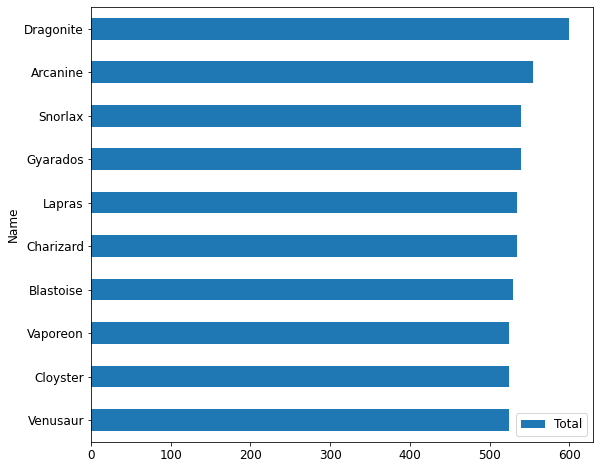

In [21]:
gen1 = pkmn[pkmn.Generation == 1]
gen1_top10 = gen1.nlargest(10, ['Total'])
gen1_top10.sort_values("Total", ascending=True).plot(x='Name', y='Total', kind='barh')
gen1_top10

## Generation 2

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
230,Kingdra,Water,Dragon,540,75,95,95,95,95,85,2,False
242,Blissey,Normal,NoType,540,255,10,10,75,135,55,2,False
169,Crobat,Poison,Flying,535,85,90,80,70,80,130,2,False
157,Typhlosion,Fire,NoType,534,78,84,78,109,85,100,2,False
160,Feraligatr,Water,NoType,530,85,105,100,79,83,78,2,False
154,Meganium,Grass,NoType,525,80,82,100,83,100,80,2,False
196,Espeon,Psychic,NoType,525,65,65,60,130,95,110,2,False
197,Umbreon,Dark,NoType,525,95,65,110,60,130,65,2,False


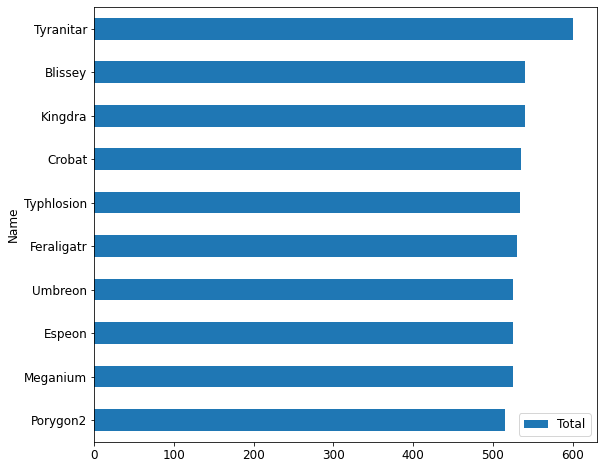

In [22]:
gen2 = pkmn[pkmn.Generation == 2]
gen2_top10 = gen2.nlargest(10, ['Total'])
gen2_top10.sort_values("Total", ascending=True).plot(x='Name', y='Total', kind='barh')
gen2_top10

## Generation 3


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
289,Slaking,Normal,NoType,670,150,160,100,95,65,100,3,False
373,Salamence,Dragon,Flying,600,95,135,80,110,80,100,3,False
376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False
350,Milotic,Water,NoType,540,95,60,79,100,125,81,3,False
260,Swampert,Water,Ground,535,100,110,90,85,90,60,3,False
254,Sceptile,Grass,NoType,530,70,85,65,105,85,120,3,False
257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
306,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False
365,Walrein,Ice,Water,530,110,80,90,95,90,65,3,False


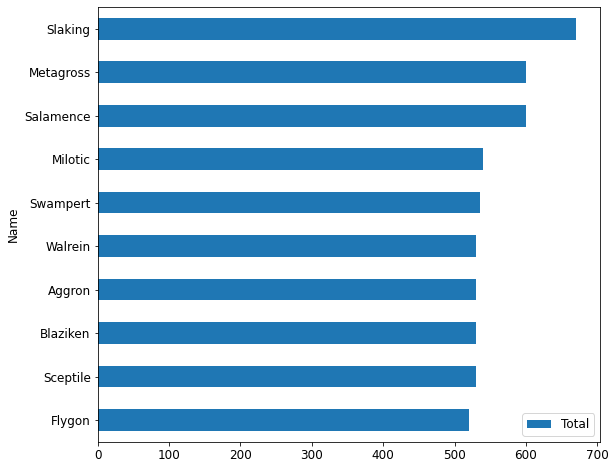

In [23]:
gen3 = pkmn[pkmn.Generation == 3]
gen3_top10 = gen3.nlargest(10, ['Total'])
gen3_top10.sort_values("Total", ascending=True).plot(x='Name', y='Total', kind='barh')
gen3_top10

## Generation 4

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False
468,Togekiss,Fairy,Flying,545,85,50,95,120,115,80,4,False
466,Electivire,Electric,NoType,540,75,123,67,95,85,95,4,False
467,Magmortar,Fire,NoType,540,75,95,67,125,95,83,4,False
462,Magnezone,Electric,Steel,535,70,70,115,130,90,60,4,False
464,Rhyperior,Ground,Rock,535,115,140,130,55,55,40,4,False
465,Tangrowth,Grass,NoType,535,100,100,125,110,50,50,4,False
474,Porygon-Z,Normal,NoType,535,85,80,70,135,75,90,4,False
392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False


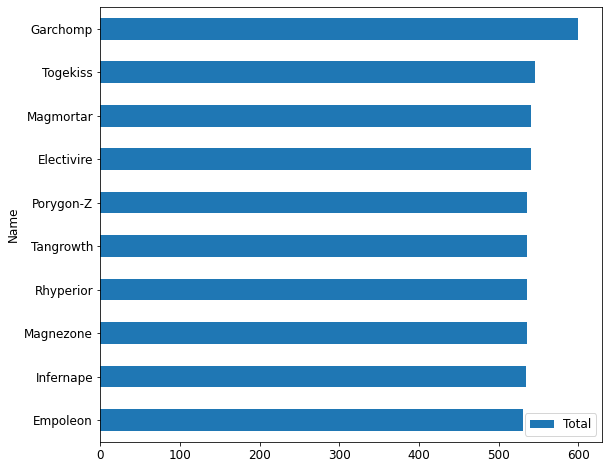

In [24]:
gen4 = pkmn[pkmn.Generation == 4]
gen4_top10 = gen4.nlargest(10, ['Total'])
gen4_top10.sort_values("Total", ascending=True).plot(x='Name', y='Total', kind='barh')
gen4_top10

## Generation 5

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False
567,Archeops,Rock,Flying,567,75,140,65,112,65,110,5,False
637,Volcarona,Bug,Fire,550,85,60,65,135,105,100,5,False
555,DarmanitanZen Mode,Fire,Psychic,540,105,30,105,140,105,55,5,False
612,Haxorus,Dragon,NoType,540,76,147,90,60,70,97,5,False
584,Vanilluxe,Ice,NoType,535,71,95,85,110,95,79,5,False
497,Serperior,Grass,NoType,528,75,75,95,75,95,113,5,False
500,Emboar,Fire,Fighting,528,110,123,65,100,65,65,5,False
503,Samurott,Water,NoType,528,95,100,85,108,70,70,5,False


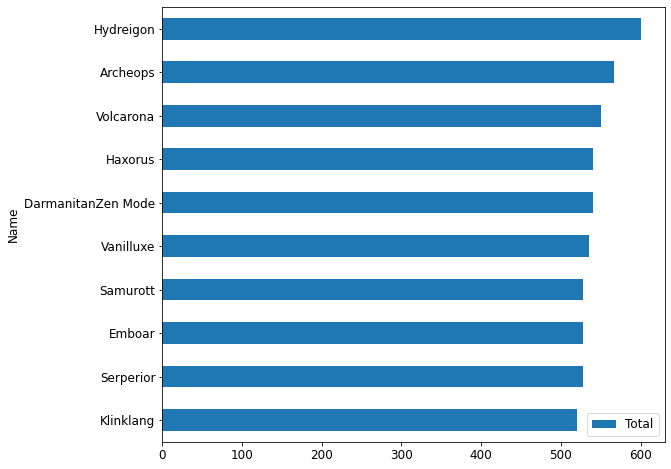

In [25]:
gen5 = pkmn[pkmn.Generation == 5]
gen5_top10 = gen5.nlargest(10, ['Total'])
gen5_top10.sort_values("Total", ascending=True).plot(x='Name', y='Total', kind='barh')
gen5_top10

## Generation 6

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
706,Goodra,Dragon,NoType,600,90,100,70,110,150,80,6,False
671,Florges,Fairy,NoType,552,78,65,68,112,154,75,6,False
715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
655,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False
673,Gogoat,Grass,NoType,531,123,100,62,97,81,68,6,False
652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False
658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False
700,Sylveon,Fairy,NoType,525,95,65,65,110,130,60,6,False
697,Tyrantrum,Rock,Dragon,521,82,121,119,69,59,71,6,False


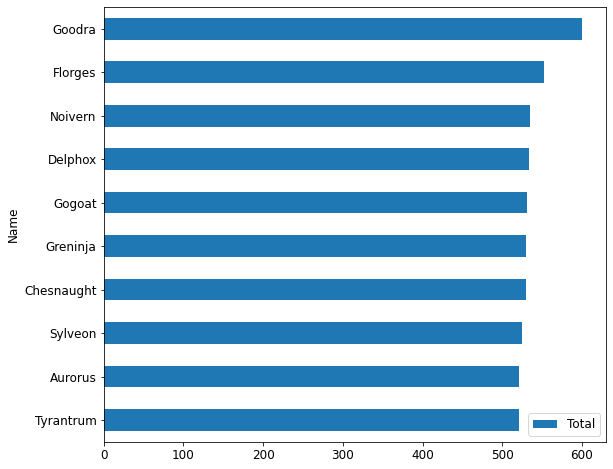

In [26]:
gen6 = pkmn[pkmn.Generation == 6]
gen6_top10 = gen6.nlargest(10, ['Total'])
gen6_top10.sort_values("Total", ascending=True).plot(x='Name', y='Total', kind='barh')
gen6_top10

## All Generations

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
289,Slaking,Normal,NoType,670,150,160,100,95,65,100,3,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
373,Salamence,Dragon,Flying,600,95,135,80,110,80,100,3,False
376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False
445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False
635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False
706,Goodra,Dragon,NoType,600,90,100,70,110,150,80,6,False
567,Archeops,Rock,Flying,567,75,140,65,112,65,110,5,False


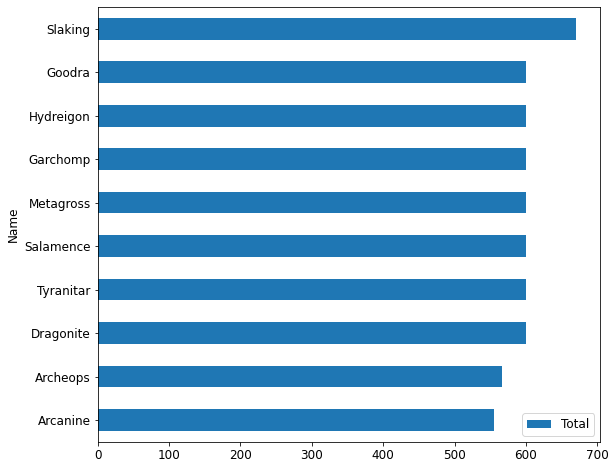

In [27]:
gen_all = pkmn.nlargest(10, ['Total'])
gen_all.sort_values("Total", ascending=True).plot(x='Name', y='Total', kind='barh')
gen_all

###                                             We are done!  Now go catch em all!!!

![](images/drake.gif)